### Carregar os Dados no DataFrame

In [2]:
import os
import pandas as pd

# Define os caminhos das pastas
fake_texts_path = "noticias/full_texts/fake"
true_texts_path = "noticias/full_texts/true"

# Função para ler os arquivos de texto
def load_texts_from_folder(folder_path, label):
    texts = []
    for filename in os.listdir(folder_path):
        with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as file:
            texts.append({'text': file.read(), 'label': label})
    return texts

# Carregar os textos reais e falsos
fake_texts = load_texts_from_folder(fake_texts_path, 'FAKE')
true_texts = load_texts_from_folder(true_texts_path, 'REAL')

# Unir os textos em um dataframe
data = pd.DataFrame(fake_texts + true_texts)


### Pré-processamento

In [4]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Função de pré-processamento
def preprocess_text(text):
    # Remover pontuação
    text = re.sub(r'\W', ' ', text)  
    # Colocar em letras minúsculas
    text = text.lower() 
    # Remover espaços extras
    text = re.sub(r'\s+', ' ', text)  
    return text

# Aplicar o pré-processamento aos textos
data['text'] = data['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /home/cir38/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Divisão dos Dados para Treinamento e Teste

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.25, random_state=42)

### Vetorização com TF-IDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, stop_words=stopwords.words('portuguese'))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

### Treinamento o Modelo

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

### Avaliando Acuracia

In [10]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy * 100:.2f}%")

Acurácia: 96.11%


### Gerar Nuvens de Palavras(Reais)

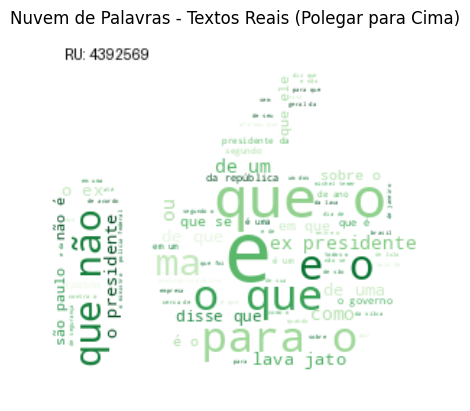

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import numpy as np

# Função para adicionar RU à imagem
def add_ru_to_image(image, ru_text, position=(10, 10)):
    draw = ImageDraw.Draw(image)
    
    # Configurar a fonte e o tamanho do texto 
    font = ImageFont.load_default() 
    
    # Adicionar o texto (RU) na imagem
    draw.text(position, ru_text, font=font, fill="black")
    return image

# Carregar a máscara do polegar para cima
thumbs_up_mask = np.array(Image.open('polegarPositivo.jpg'))

# Nuvem de palavras para textos reais (polegar para cima)
real_words = ' '.join([text for text in data[data['label'] == 'REAL']['text']])
wordcloud_real = WordCloud(width=800, height=800, background_color="white", mask=thumbs_up_mask, contour_width=0, colormap='Greens').generate(real_words)

# Converter a imagem do WordCloud em um objeto PIL para edição
image = wordcloud_real.to_image()

# Adicionar o RU
ru_text = "RU: 4392569" 
image_with_ru = add_ru_to_image(image, ru_text, position=(10, 10))

# Mostrar a imagem final
plt.imshow(image_with_ru, interpolation='bilinear')
plt.title('Nuvem de Palavras - Textos Reais (Polegar para Cima)')
plt.axis('off')
plt.show()


### Gerar Nuvens de Palavras(Falsas)

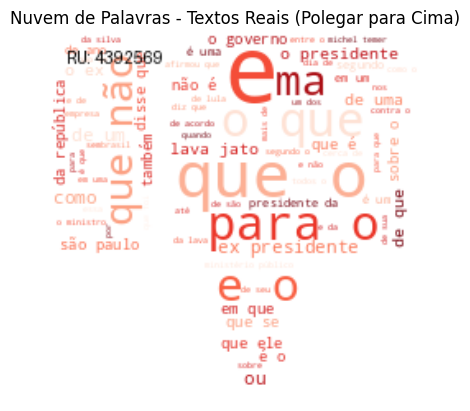

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import numpy as np

# Função para adicionar RU à imagem
def add_ru_to_image(image, ru_text, position=(10, 10)):
    draw = ImageDraw.Draw(image)
    
    # Configurar a fonte e o tamanho do texto 
    font = ImageFont.load_default() 
    
    # Adicionar o texto (RU) na imagem
    draw.text(position, ru_text, font=font, fill="black")
    return image

# Carregar a máscara do polegar para cima
thumbs_up_mask = np.array(Image.open('polegarNegativo.jpg'))

# Nuvem de palavras para textos reais (polegar para cima)
real_words = ' '.join([text for text in data[data['label'] == 'REAL']['text']])
wordcloud_real = WordCloud(width=800, height=800, background_color="white", mask=thumbs_up_mask, contour_width=0, colormap='Reds').generate(real_words)

# Converter a imagem do WordCloud em um objeto PIL para edição
image = wordcloud_real.to_image()

# Adicionar o RU
ru_text = "RU: 4392569" 
image_with_ru = add_ru_to_image(image, ru_text, position=(10, 10))

# Mostrar a imagem final
plt.imshow(image_with_ru, interpolation='bilinear')
plt.title('Nuvem de Palavras - Textos Reais (Polegar para Cima)')
plt.axis('off')
plt.show()
